# Neural network system model for towing Kite

In this Jupyter Notebook we train the neural network system model for the towing kite.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../../../do-mpc/')
import do_mpc
import pandas as pd
import scipy.io as sio
import pathlib

import tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from nn_tools import get_keras_model, NNPredictModel

In [2]:
%matplotlib notebook

## Load prepared training / test and validation data

See Jupyter Notebook ``train_test_val_data_prep.ipynb`` for details.

In [27]:
load_name = 'S01_Prep_01'
load_path = './data_prep/'

data = do_mpc.tools.load_pickle(load_path + load_name + '.pkl')

nn_in_train_scaled = data['in_train_scaled']
nn_in_test_scaled = data['in_test_scaled']
nn_out_train_scaled = data['out_train_scaled']
nn_out_test_scaled = data['out_test_scaled']

# preprocessing.StandardScaler() objects:
in_scaler = data['in_scaler']
out_scaler = data['out_scaler']

# Test sequences:
test_res = data['test_res']

/home/johannes/standard/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


## Create and train neural network

Get the keras NN model for prediction ``model`` and the ``activation_model`` for the computation of the BLL covariance.

In [63]:
np.random.seed(99)
tf.random.set_seed(99)

architecture = [(nn_in_train_scaled.shape[1],), 20, 20, nn_out_train_scaled.shape[1]]

nn_model_1, activation_model_1 = get_keras_model(architecture, 'tanh')

nn_model_1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.MSE,
)

In [64]:
np.random.seed(21)
tf.random.set_seed(21)

architecture = [(nn_in_train_scaled.shape[1],), 20, 20, nn_out_train_scaled.shape[1]]

nn_model_2, activation_model_2 = get_keras_model(architecture, 'tanh')

nn_model_2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.MSE,
)

In [65]:
np.random.seed(31)
tf.random.set_seed(31)

architecture = [(nn_in_train_scaled.shape[1],), 20, 20, nn_out_train_scaled.shape[1]]

nn_model_3, activation_model_3 = get_keras_model(architecture, 'tanh')

nn_model_3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.MSE,
)

In [77]:
np.random.seed(41)
tf.random.set_seed(41)

architecture = [(nn_in_train_scaled.shape[1],), 20, 20, nn_out_train_scaled.shape[1]]

nn_model_4, activation_model_4 = get_keras_model(architecture, 'tanh')

nn_model_4.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.MSE,
)

In [78]:
np.random.seed(51)
tf.random.set_seed(51)

architecture = [(nn_in_train_scaled.shape[1],), 20, 20, nn_out_train_scaled.shape[1]]

nn_model_5, activation_model_5 = get_keras_model(architecture, 'tanh')

nn_model_5.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.MSE,
)

In [79]:
np.random.seed(61)
tf.random.set_seed(61)

architecture = [(nn_in_train_scaled.shape[1],), 20, 20, nn_out_train_scaled.shape[1]]

nn_model_6, activation_model_6 = get_keras_model(architecture, 'tanh')

nn_model_6.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.MSE,
)

Train the neural network. We capture the output to better display the results on Github.

In [68]:

history_1 = nn_model_1.fit(
    nn_in_train_scaled, 
    nn_out_train_scaled,
    validation_data = (nn_in_test_scaled, nn_out_test_scaled),
    epochs=1000,
    batch_size=200,
    verbose=1
)

Epoch 1/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4840 - val_loss: 1.1590
Epoch 2/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1237 - val_loss: 0.8946
Epoch 3/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8767 - val_loss: 0.7188
Epoch 4/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7128 - val_loss: 0.6038
Epoch 5/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6052 - val_loss: 0.5284
Epoch 6/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5342 - val_loss: 0.4789
Epoch 7/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4873 - val_loss: 0.4468
Epoch 8/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4566 - val_loss: 0.4257
Epoch 9/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4362 - val_loss: 0.4105
Epoch 10/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4213 - val_loss: 0.3979
Epoch 11/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4089 - val_loss: 0.3859
Epoch 12/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Plot the training progression (training loss and validation loss)

In [69]:

history_2 = nn_model_2.fit(
    nn_in_train_scaled, 
    nn_out_train_scaled,
    validation_data = (nn_in_test_scaled, nn_out_test_scaled),
    epochs=1000,
    batch_size=200,
    verbose=1
)

Epoch 1/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0036 - val_loss: 0.0037
Epoch 2/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 3/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0035 - val_loss: 0.0036
Epoch 4/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0035 - val_loss: 0.0036
Epoch 5/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0035 - val_loss: 0.0036
Epoch 6/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0035 - val_loss: 0.0036
Epoch 7/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0034 - val_loss: 0.0035
Epoch 8/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0034 - val_loss: 0.0035
Epoch 9/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0034 - val_loss: 0.0035
Epoch 10/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0034 - val_loss: 0.0035
Epoch 11/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0034 - val_loss: 0.0035
Epoch 12/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [70]:

history_3 = nn_model_3.fit(
    nn_in_train_scaled, 
    nn_out_train_scaled,
    validation_data = (nn_in_test_scaled, nn_out_test_scaled),
    epochs=1000,
    batch_size=200,
    verbose=1
)

Epoch 1/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.3448 - val_loss: 1.0092
Epoch 2/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0040 - val_loss: 0.7920
Epoch 3/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8027 - val_loss: 0.6597
Epoch 4/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6752 - val_loss: 0.5703
Epoch 5/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5868 - val_loss: 0.5071
Epoch 6/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5225 - val_loss: 0.4622
Epoch 7/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4761 - val_loss: 0.4311
Epoch 8/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4433 - val_loss: 0.4094
Epoch 9/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4201 - val_loss: 0.3931
Epoch 10/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4024 - val_loss: 0.3790
Epoch 11/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3872 - val_loss: 0.3652
Epoch 12/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [71]:

history_4 = nn_model_4.fit(
    nn_in_train_scaled, 
    nn_out_train_scaled,
    validation_data = (nn_in_test_scaled, nn_out_test_scaled),
    epochs=1000,
    batch_size=200,
    verbose=1
)

Epoch 1/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.0257 - val_loss: 0.7902
Epoch 2/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7724 - val_loss: 0.6304
Epoch 3/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6315 - val_loss: 0.5390
Epoch 4/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5483 - val_loss: 0.4833
Epoch 5/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4956 - val_loss: 0.4462
Epoch 6/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4587 - val_loss: 0.4197
Epoch 7/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4310 - val_loss: 0.3997
Epoch 8/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4092 - val_loss: 0.3833
Epoch 9/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3910 - val_loss: 0.3686
Epoch 10/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3748 - val_loss: 0.3541
Epoch 11/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3593 - val_loss: 0.3392
Epoch 12/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [80]:

history_5 = nn_model_5.fit(
    nn_in_train_scaled, 
    nn_out_train_scaled,
    validation_data = (nn_in_test_scaled, nn_out_test_scaled),
    epochs=1000,
    batch_size=200,
    verbose=1
)

Epoch 1/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.1299 - val_loss: 0.8989
Epoch 2/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8581 - val_loss: 0.7128
Epoch 3/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6868 - val_loss: 0.5945
Epoch 4/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5792 - val_loss: 0.5209
Epoch 5/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5123 - val_loss: 0.4764
Epoch 6/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4712 - val_loss: 0.4491
Epoch 7/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4451 - val_loss: 0.4307
Epoch 8/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4268 - val_loss: 0.4168
Epoch 9/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4124 - val_loss: 0.4049
Epoch 10/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3998 - val_loss: 0.3941
Epoch 11/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3882 - val_loss: 0.3836
Epoch 12/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [81]:

history_6 = nn_model_6.fit(
    nn_in_train_scaled, 
    nn_out_train_scaled,
    validation_data = (nn_in_test_scaled, nn_out_test_scaled),
    epochs=1000,
    batch_size=200,
    verbose=1
)

Epoch 1/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.5370 - val_loss: 1.2182
Epoch 2/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1699 - val_loss: 0.9603
Epoch 3/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9299 - val_loss: 0.7898
Epoch 4/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7670 - val_loss: 0.6689
Epoch 5/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6504 - val_loss: 0.5803
Epoch 6/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5663 - val_loss: 0.5179
Epoch 7/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5085 - val_loss: 0.4773
Epoch 8/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4716 - val_loss: 0.4526
Epoch 9/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4496 - val_loss: 0.4380
Epoch 10/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4363 - val_loss: 0.4289
Epoch 11/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4276 - val_loss: 0.4221
Epoch 12/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

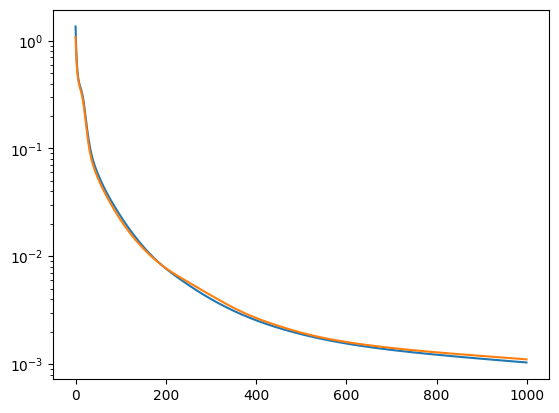

In [56]:
fig, ax = plt.subplots()
ax.semilogy(history_1.history['loss'], label='training loss')
ax.semilogy(history_1.history['val_loss'], label='validation loss')

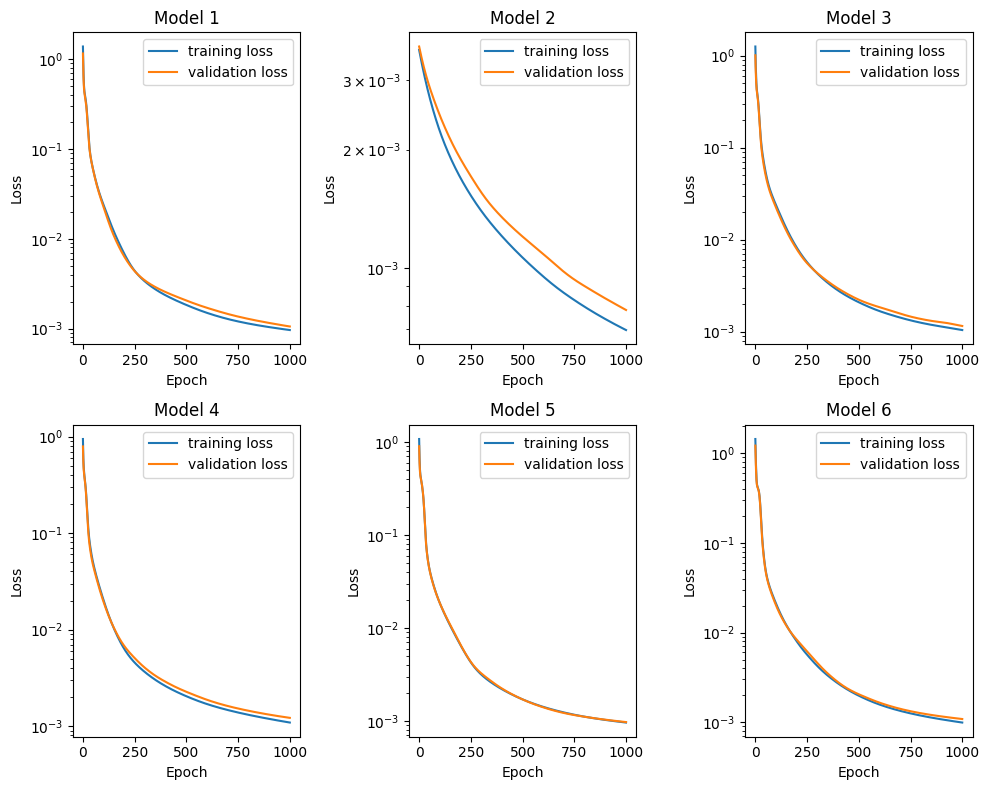

In [83]:
fig, axes = plt.subplots(2, 3, figsize=(10, 8))
axes = axes.flatten()

for i, history in enumerate([history_1, history_2, history_3, history_4, history_5, history_6]):
    ax = axes[i]
    ax.semilogy(history.history['loss'], label='training loss')
    ax.semilogy(history.history['val_loss'], label='validation loss')
    ax.set_title(f"Model {i+1}")
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.legend()

plt.tight_layout()
plt.show()


## Open-loop predictions

Compute an open-loop prediction for one of the test cases. Choose the case with ``case = ...``.
The open-loop predictions are computed through the class ``NNPredictModel``.

In [57]:
case = 0

x0 = (test_res[case]['states'][0]).reshape(-1,1)
a_train = activation_model_1.predict(nn_in_train_scaled)

pm = NNPredictModel(nn_model_1, activation_model_1, 
                    a_train, in_scaler, out_scaler, x0,
                   sig_e=1, sig_w=1e3)

for k in range(test_res[case]['states'].shape[0]):
    u0 = test_res[case]['input'][k]
    p = test_res[case]['wind'][k]
    pm.make_step(u0,p)

101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step


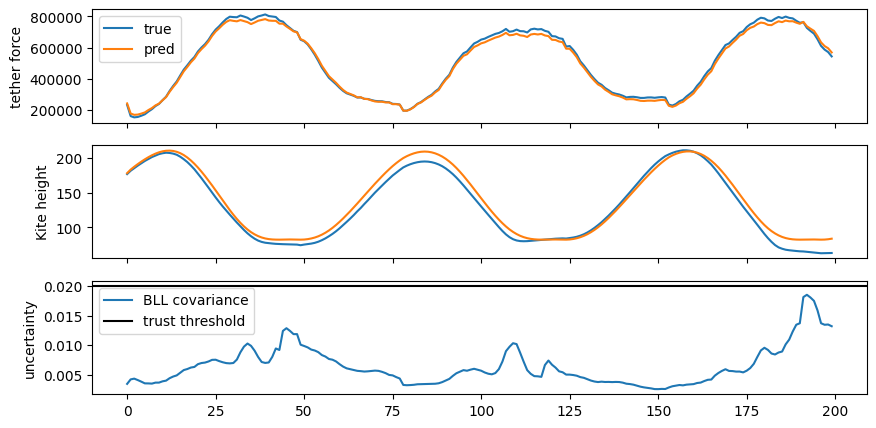

In [58]:
fig, ax = plt.subplots(3,1, sharex=True, figsize=(10,5))

ax[0].plot(pm.aux[:,0],label='true')
ax[0].plot(test_res[case]['T_F'], label='pred')
ax[0].set_ylabel('tether force')
ax[0].legend()

ax[1].plot(pm.aux[:,1])
ax[1].plot(test_res[case]['height'])
ax[1].set_ylabel('Kite height')

ax[2].plot(pm.v, label='BLL covariance')
ax[2].set_ylabel('uncertainty')

trust_threshold = 0.02
ax[2].axhline(trust_threshold, label='trust threshold', color='k')
ax[2].legend()

101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step


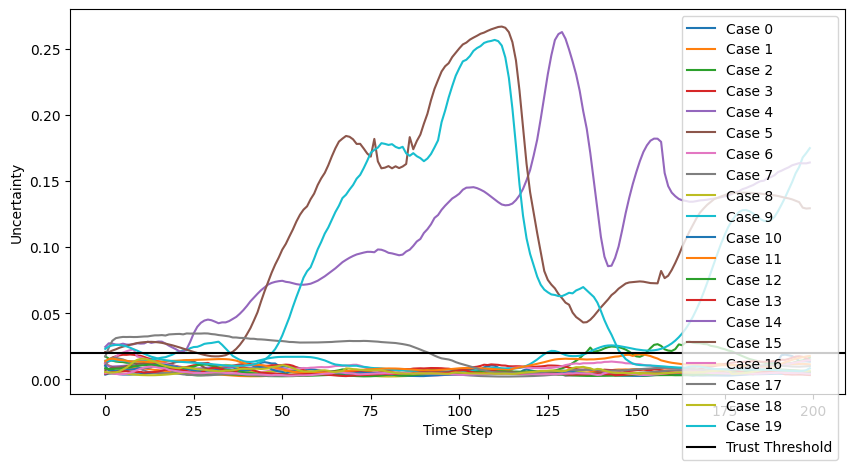

In [62]:
trust_threshold = 0.02

fig, ax = plt.subplots(figsize=(10, 5))

for case in range(20):
    x0 = (test_res[case]['states'][0]).reshape(-1, 1)
    a_train = activation_model_1.predict(nn_in_train_scaled)
    
    pm = NNPredictModel(nn_model_1, activation_model_1, a_train, in_scaler, out_scaler, x0, sig_e=1, sig_w=1e3)
    
    for k in range(test_res[case]['states'].shape[0]):
        u0 = test_res[case]['input'][k]
        p = test_res[case]['wind'][k]
        pm.make_step(u0, p)
    
    ax.plot(pm.v, label=f'Case {case}')  # Uncertainty

ax.set_ylabel('Uncertainty')
ax.axhline(trust_threshold, label='Trust Threshold', color='k')
ax.legend()

plt.xlabel('Time Step')
plt.show()


101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 283us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step
101/101 ━━━━━

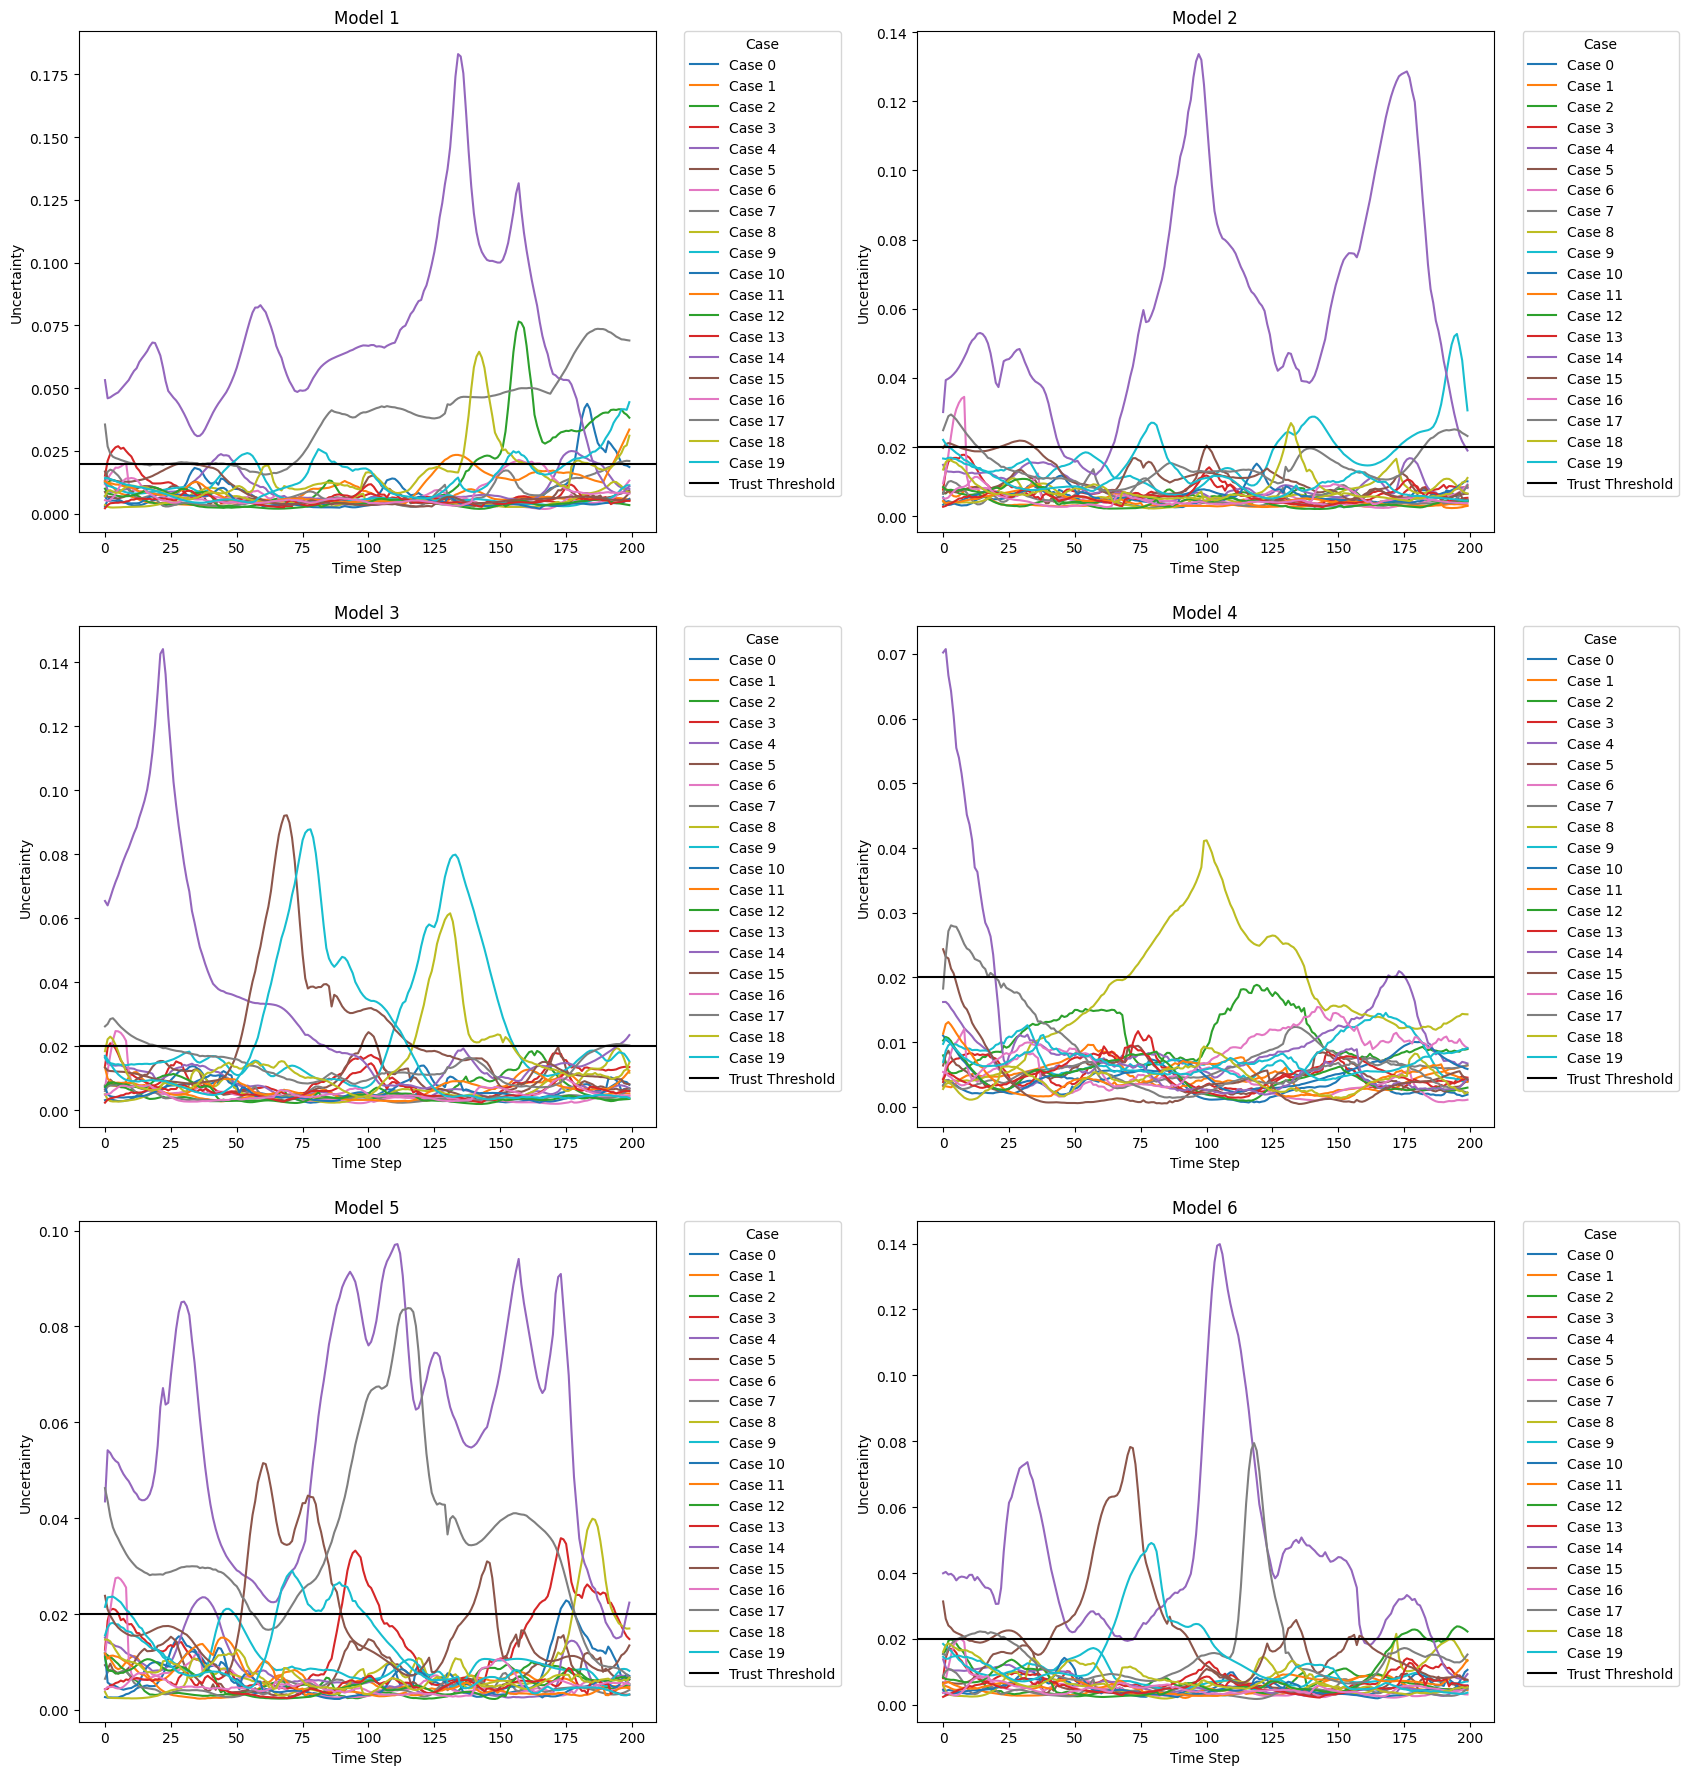

In [84]:
trust_threshold = 0.02

fig, axes = plt.subplots(3, 2, figsize=(17, 18))

for model_num, ax in zip(range(1, 7), axes.flat):  # Iterate over models 1 to 6
    nn_model = globals()[f'nn_model_{model_num}']
    activation_model = globals()[f'activation_model_{model_num}']
    
    for case in range(20):
        x0 = (test_res[case]['states'][0]).reshape(-1, 1)
        a_train = activation_model.predict(nn_in_train_scaled)
        
        pm = NNPredictModel(nn_model, activation_model, a_train, in_scaler, out_scaler, x0, sig_e=1, sig_w=1e3)
        
        for k in range(test_res[case]['states'].shape[0]):
            u0 = test_res[case]['input'][k]
            p = test_res[case]['wind'][k]
            pm.make_step(u0, p)
        
        ax.plot(pm.v, label=f'Case {case}')  # Uncertainty
        
    ax.set_title(f'Model {model_num}')
    ax.set_ylabel('Uncertainty')
    ax.set_xlabel('Time Step')
    ax.axhline(trust_threshold, label='Trust Threshold', color='k')

# Place the legend outside the plot
axes[0, 0].legend(loc='upper left', bbox_to_anchor=(1.05, 1), title="Case", borderaxespad=0.)
axes[0, 1].legend(loc='upper left', bbox_to_anchor=(1.05, 1), title="Case", borderaxespad=0.)
axes[1, 0].legend(loc='upper left', bbox_to_anchor=(1.05, 1), title="Case", borderaxespad=0.)
axes[1, 1].legend(loc='upper left', bbox_to_anchor=(1.05, 1), title="Case", borderaxespad=0.)
axes[2, 0].legend(loc='upper left', bbox_to_anchor=(1.05, 1), title="Case", borderaxespad=0.)
axes[2, 1].legend(loc='upper left', bbox_to_anchor=(1.05, 1), title="Case", borderaxespad=0.)

plt.tight_layout()
plt.show()


101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
101/101 ━━━

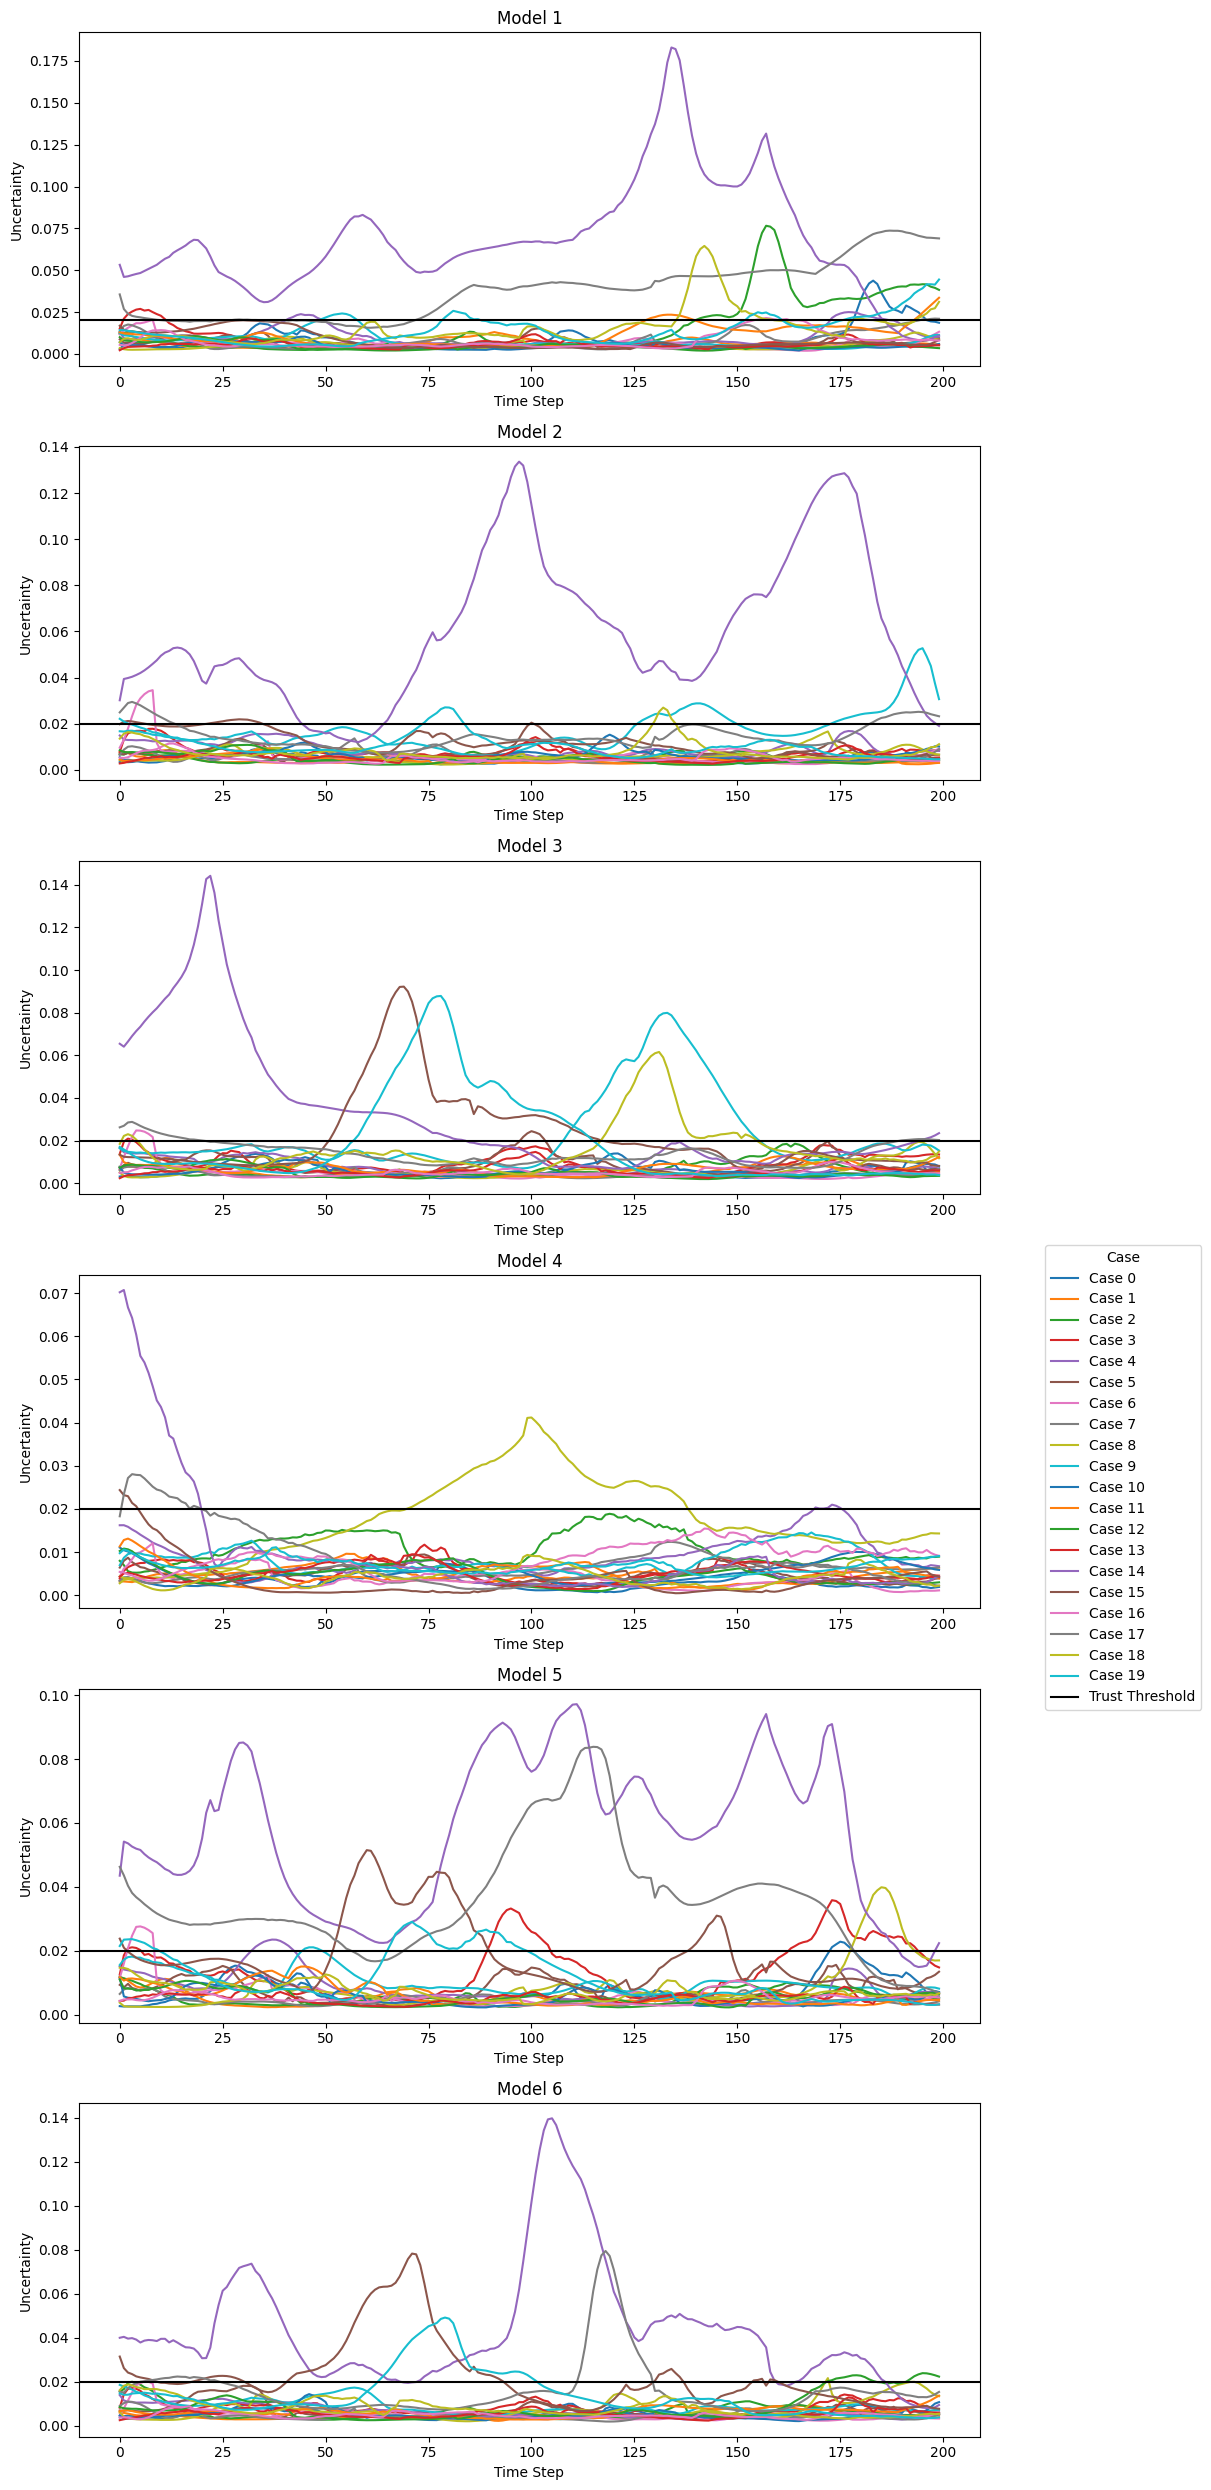

In [121]:
import matplotlib.pyplot as plt

trust_threshold = 0.02

fig, axes = plt.subplots(6, 1, figsize=(10, 25))  # Create a single column of subplots
legend_handles = []  # List to store legend handles

for model_num, ax in zip(range(1, 7), axes):  # Iterate over models 1 to 6
    nn_model = globals()[f'nn_model_{model_num}']
    activation_model = globals()[f'activation_model_{model_num}']
    
    for case in range(20):
        x0 = (test_res[case]['states'][0]).reshape(-1, 1)
        a_train = activation_model.predict(nn_in_train_scaled)
        
        pm = NNPredictModel(nn_model, activation_model, a_train, in_scaler, out_scaler, x0, sig_e=1, sig_w=1e3)
        
        for k in range(test_res[case]['states'].shape[0]):
            u0 = test_res[case]['input'][k]
            p = test_res[case]['wind'][k]
            pm.make_step(u0, p)
        
        ax.plot(pm.v, label=f'Case {case}')  # Uncertainty
        
    ax.set_title(f'Model {model_num}')
    ax.set_ylabel('Uncertainty')
    ax.set_xlabel('Time Step')
    ax.axhline(trust_threshold, label='Trust Threshold', color='k')

    # Get handles and labels for this subplot's legend
    handles, labels = ax.get_legend_handles_labels()
    legend_handles.extend(handles)  # Extend the list of handles

plt.tight_layout()  # Adjust the layout

# Create a legend outside the loop and save the legend to the PDF
fig.legend(legend_handles, labels, loc='upper left', title="Case", bbox_to_anchor=(1.05, 0.5), borderaxespad=0.)
plt.savefig('plot_single_column_with_legend.pdf', format='pdf', bbox_inches='tight')
plt.show()


In [ ]:
trust_threshold = 0.02
cases_above_threshold = {}

for model_num in range(1, 7):  # Iterate over models 1 to 6
    nn_model = globals()[f'nn_model_{model_num}']
    activation_model = globals()[f'activation_model_{model_num}']
    
    num_cases_above_threshold = 0
    
    for case in range(20):
        x0 = (test_res[case]['states'][0]).reshape(-1, 1)
        a_train = activation_model.predict(nn_in_train_scaled)
        
        pm = NNPredictModel(nn_model, activation_model, a_train, in_scaler, out_scaler, x0, sig_e=1, sig_w=1e3)
        
        for k in range(test_res[case]['states'].shape[0]):
            u0 = test_res[case]['input'][k]
            p = test_res[case]['wind'][k]
            pm.make_step(u0, p)
        
        # Check if any uncertainty values are above the threshold for this case
        if any(value > trust_threshold for value in pm.v):
            num_cases_above_threshold += 1
            
    cases_above_threshold[model_num] = num_cases_above_threshold

print("Cases above threshold per model:")
for model, num_cases in cases_above_threshold.items():
    print(f"Model {model}: {num_cases} cases above threshold")


101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step
101/101 ━━━

In [86]:
cases_above_threshold

{1: 14, 2: 8, 3: 9, 4: 5, 5: 10, 6: 7}

In [90]:
trust_threshold = 0.02
cases_above_threshold = {}

for model_num in range(1, 7):  # Iterate over models 1 to 6
    nn_model = globals()[f'nn_model_{model_num}']
    activation_model = globals()[f'activation_model_{model_num}']
    
    num_cases_above_threshold = 0
    total_diff_above_threshold = 0
    diff_per_case = []
    
    for case in range(20):
        x0 = (test_res[case]['states'][0]).reshape(-1, 1)
        a_train = activation_model.predict(nn_in_train_scaled)
        
        pm = NNPredictModel(nn_model, activation_model, a_train, in_scaler, out_scaler, x0, sig_e=1, sig_w=1e3)
        
        for k in range(test_res[case]['states'].shape[0]):
            u0 = test_res[case]['input'][k]
            p = test_res[case]['wind'][k]
            pm.make_step(u0, p)
        
        # Calculate how much each value above the threshold exceeds the threshold
        diff_above_threshold = [value - trust_threshold for value in pm.v if value > trust_threshold]
        
        # Update total difference above threshold
        total_diff_above_threshold += sum(diff_above_threshold)
        
        # Check if any uncertainty values are above the threshold for this case
        if any(value > trust_threshold for value in pm.v):
            num_cases_above_threshold += 1
            diff_per_case.append(diff_above_threshold)
    
    # Calculate average difference above threshold
    average_diff_above_threshold = total_diff_above_threshold / num_cases_above_threshold if num_cases_above_threshold > 0 else 0
    
    cases_above_threshold[model_num] = {
        'count': num_cases_above_threshold,
        'average_diff': average_diff_above_threshold,
        'diff_per_case': diff_per_case
    }



101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step
101/101 ━━━━━

In [91]:
cases_above_threshold


{1: {'count': 14,
  'average_diff': array([1.1019257]),
  'diff_per_case': [[array([0.00563222]),
    array([0.01250918]),
    array([0.01816802]),
    array([0.0221024]),
    array([0.02377686]),
    array([0.02178698]),
    array([0.01649422]),
    array([0.01221534]),
    array([0.00821271]),
    array([0.0065513]),
    array([0.00574551]),
    array([0.00451645]),
    array([0.00887919]),
    array([0.00770869]),
    array([0.00623267]),
    array([0.00490529]),
    array([0.00250704]),
    array([0.00017518])],
   [array([0.00031171]),
    array([0.00136611]),
    array([0.00201924]),
    array([0.00247285]),
    array([0.00296973]),
    array([0.003181]),
    array([0.0030394]),
    array([0.00243318]),
    array([0.00192775]),
    array([0.00245968]),
    array([0.00389263]),
    array([0.00678374]),
    array([0.01276912]),
    array([0.02228449]),
    array([0.03302506]),
    array([0.04434613]),
    array([0.05227295]),
    array([0.05655449]),
    array([0.05604423]),
    ar

In [114]:
import numpy as np

for model, info in cases_above_threshold.items():
    if info['count'] > 0:
        diff_per_case_flat = np.concatenate(info['diff_per_case'])
        average_diff_above_threshold = np.mean(diff_per_case_flat)
        print(f"Model {model}: {info['count']} cases above threshold (Average value above threshold: {average_diff_above_threshold:.4f})")
        #print("Difference per case:")
        #for idx, diff in enumerate(info['diff_per_case']):
         #   print(f"Case {idx + 1}: {diff}")
    else:
        print(f"Model {model}: No cases above threshold")


Model 1: 14 cases above threshold (Average value above threshold: 0.0267)
Model 2: 8 cases above threshold (Average value above threshold: 0.0287)
Model 3: 9 cases above threshold (Average value above threshold: 0.0238)
Model 4: 5 cases above threshold (Average value above threshold: 0.0099)
Model 5: 10 cases above threshold (Average value above threshold: 0.0223)
Model 6: 7 cases above threshold (Average value above threshold: 0.0195)


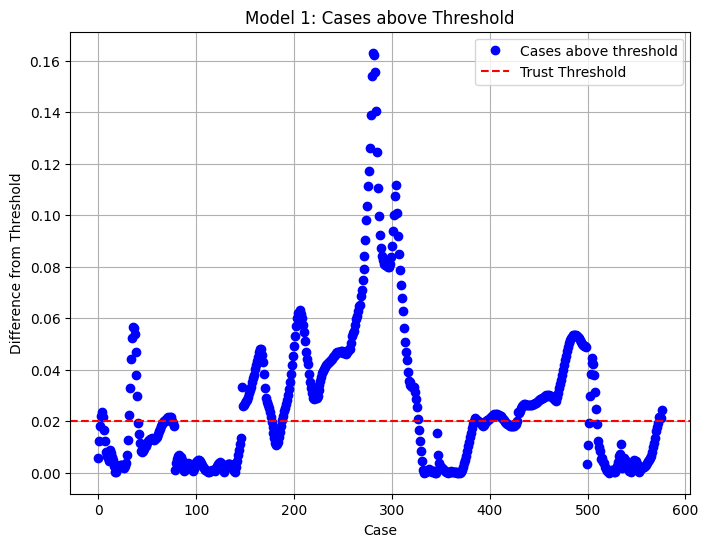

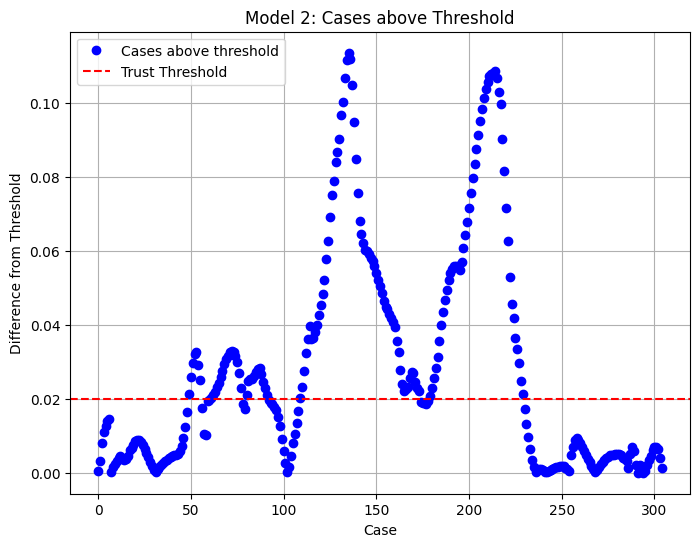

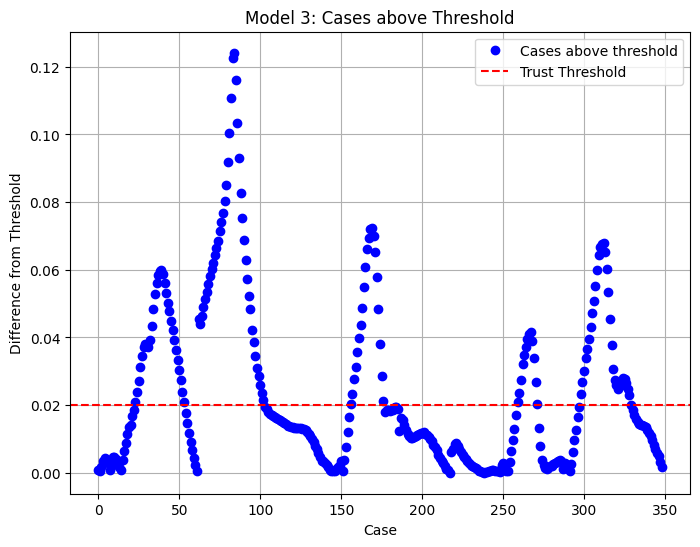

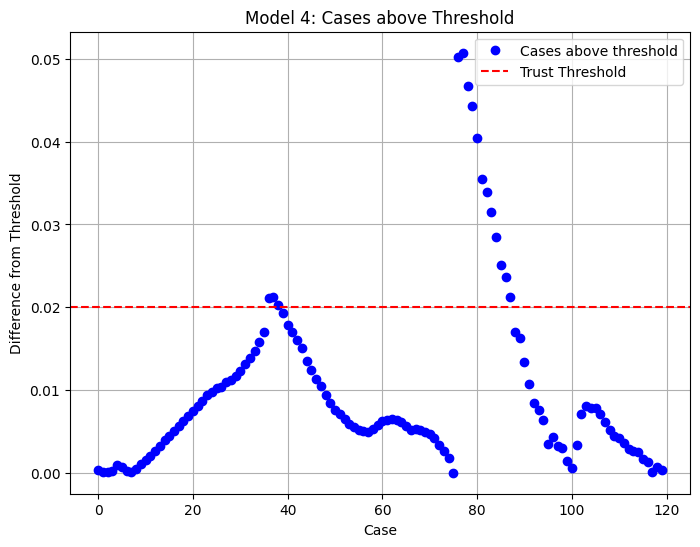

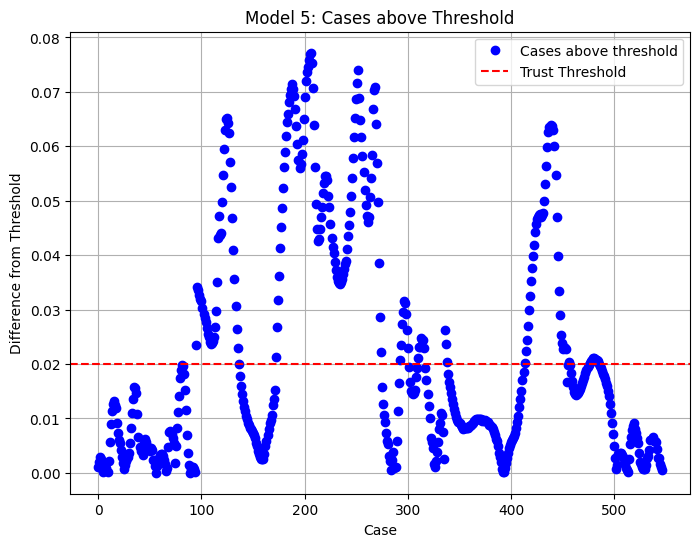

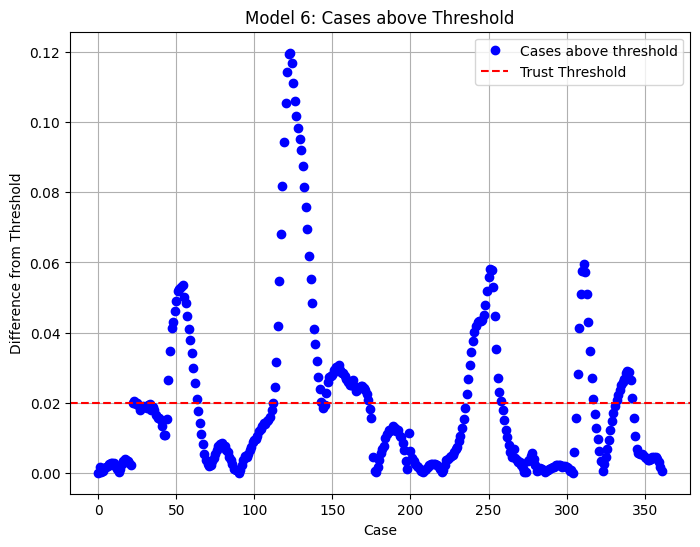

In [96]:
import numpy as np
import matplotlib.pyplot as plt

for model, info in cases_above_threshold.items():
    if info['count'] > 0:
        # Flatten the array of differences per case
        diff_per_case_flat = np.concatenate(info['diff_per_case'])
        
        # Plotting
        plt.figure(figsize=(8, 6))
        plt.plot(diff_per_case_flat, marker='o', linestyle='', color='blue', label='Cases above threshold')
        plt.axhline(y=trust_threshold, color='red', linestyle='--', label='Trust Threshold')
        plt.title(f'Model {model}: Cases above Threshold')
        plt.xlabel('Case')
        plt.ylabel('Difference from Threshold')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print(f"Model {model}: No cases above threshold")


In [101]:
# Define a function to make predictions for a given model
def make_predictions(model_num):
    predictions = []
    activation_model = globals()[f'activation_model_{model_num}']
    nn_model = globals()[f'nn_model_{model_num}']
    for case in range(20):
        x0 = (test_res[case]['states'][0]).reshape(-1, 1)
        a_train = activation_model.predict(nn_in_train_scaled)

        pm = NNPredictModel(nn_model, activation_model, a_train, in_scaler, out_scaler, x0, sig_e=1, sig_w=1e3)

        for k in range(test_res[case]['states'].shape[0]):
            u0 = test_res[case]['input'][k]
            p = test_res[case]['wind'][k]
            pm.make_step(u0, p)

        predictions.append(pm)
    return predictions

# Make predictions for all models 1 to 6
all_predictions = {}
for model_num in range(1, 7):
    all_predictions[model_num] = make_predictions(model_num)


101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 293us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
101/101 ━━━━━━━━━

Compute open-loop predictions for all test cases:

In [105]:
nn_traj_all = [[] for _ in range(6)]
nn_trust_all = [[] for _ in range(6)]

n_eval = min(20, len(test_res))

for model_num in range(1, 7):
    activation_model = globals()[f'activation_model_{model_num}']
    nn_model = globals()[f'nn_model_{model_num}']
    
    for i, res_i in enumerate(test_res[:n_eval]):
        x0 = (res_i['states'][0]).reshape(-1, 1)
        a_train = activation_model.predict(nn_in_train_scaled)

        pm = NNPredictModel(nn_model, activation_model, a_train, in_scaler, out_scaler, x0, sig_e=1, sig_w=1e3)

        for k in range(res_i['states'].shape[0]):
            u0 = res_i['input'][k]
            p = res_i['wind'][k]
            pm.make_step(u0, p)
        
        nn_traj_all[model_num - 1].append(pm.x)
        nn_trust_all[model_num - 1].append(pm.v)


101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step
101/101 ━━━

Plot all test cases  and flag points with trust violations.

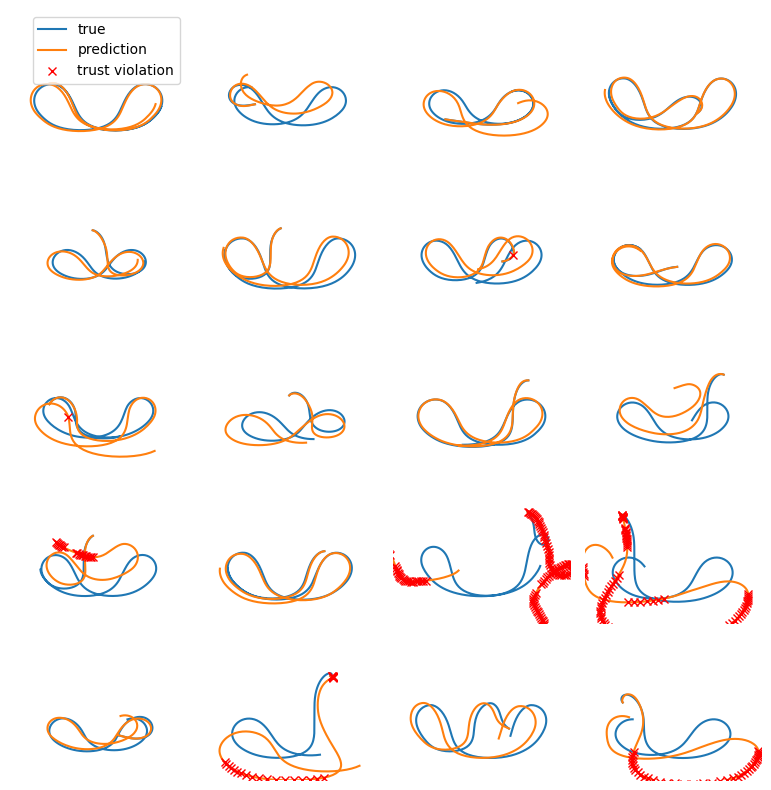

In [100]:
n_row = int(np.ceil(np.sqrt(n_eval)))
n_col = int(np.ceil(n_eval/n_row))

trust_threshold = 0.02


fig, ax = plt.subplots(n_row, n_col, sharex=True, sharey=True, figsize=(8,8))
for i, res_i in enumerate(test_res[:n_eval]):
    ax[i//n_col, np.mod(i,n_col)].plot(res_i['states'][:,1],res_i['states'][:,0], label='true')
    ax[i//n_col, np.mod(i,n_col)].plot(nn_traj[i][:,1], nn_traj[i][:,0], label='prediction')
    
    viol_ind = (nn_trust[i]>= trust_threshold).flatten()
    ax[i//n_col, np.mod(i,n_col)].plot(nn_traj[i][1:,:][viol_ind,1], nn_traj[i][1:,:][viol_ind,0],
                                      'x', color='red', label='trust violation')
    
    
for i in range(ax.size):
    ax[i//n_col, np.mod(i,n_col)].axis('off')

ax[0,0].legend()
ax[0,0].set_xlim(-np.pi/2,np.pi/2)
ax[0,0].set_ylim(0,np.pi/2)

fig.tight_layout()

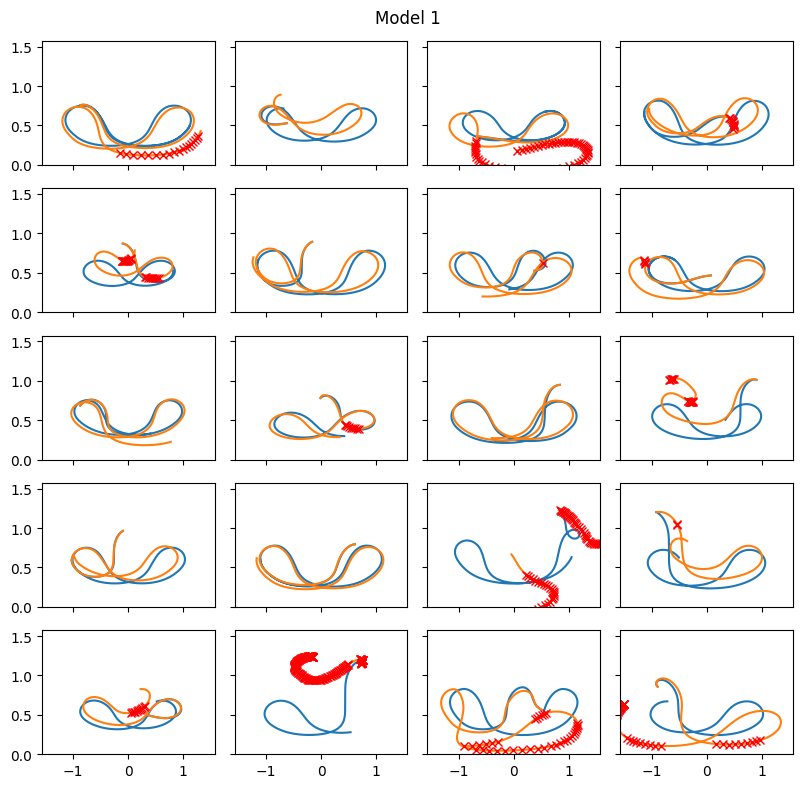

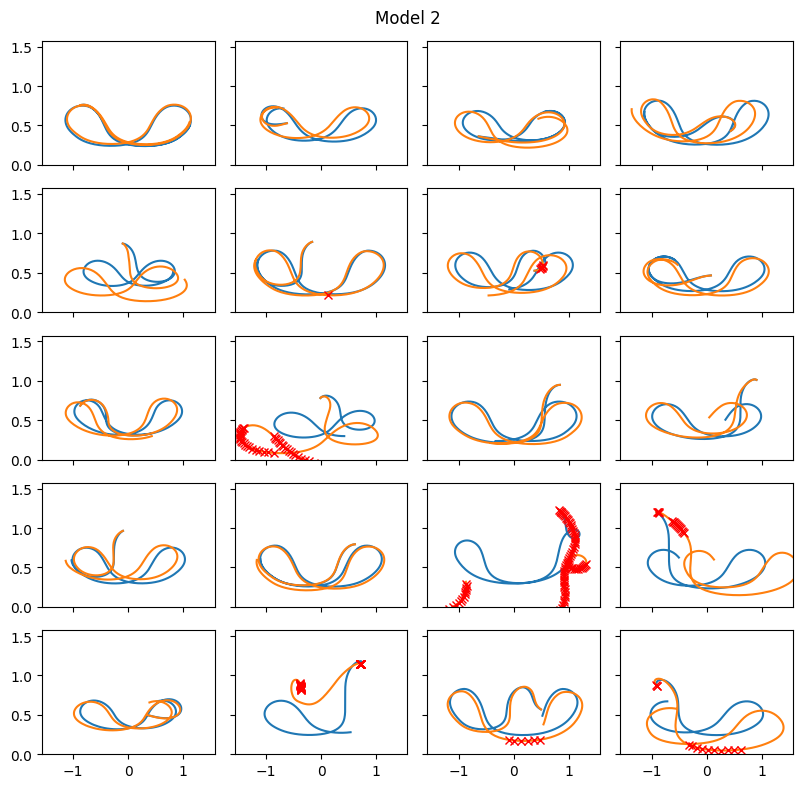

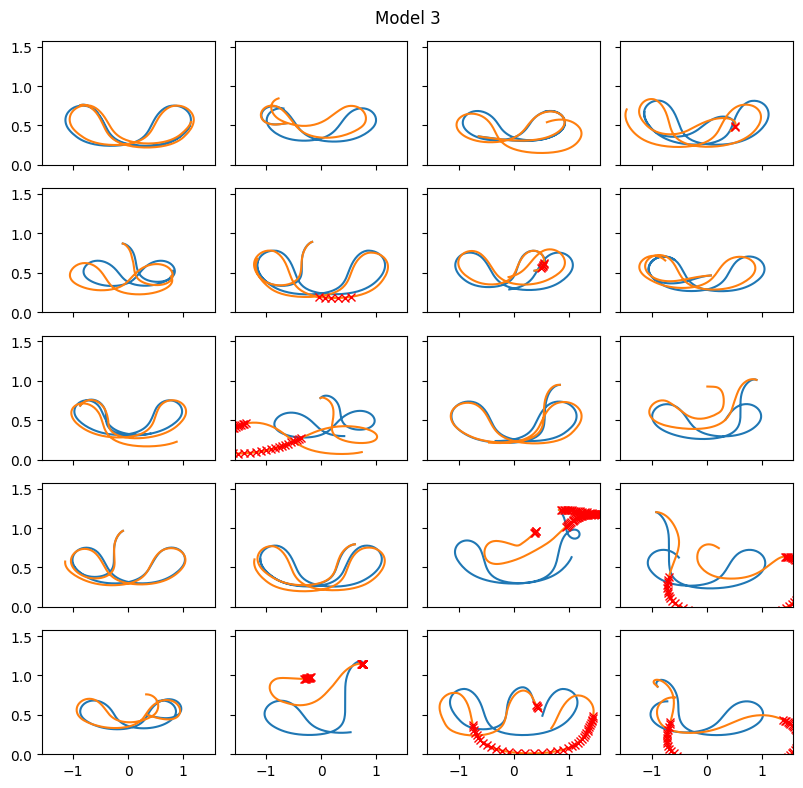

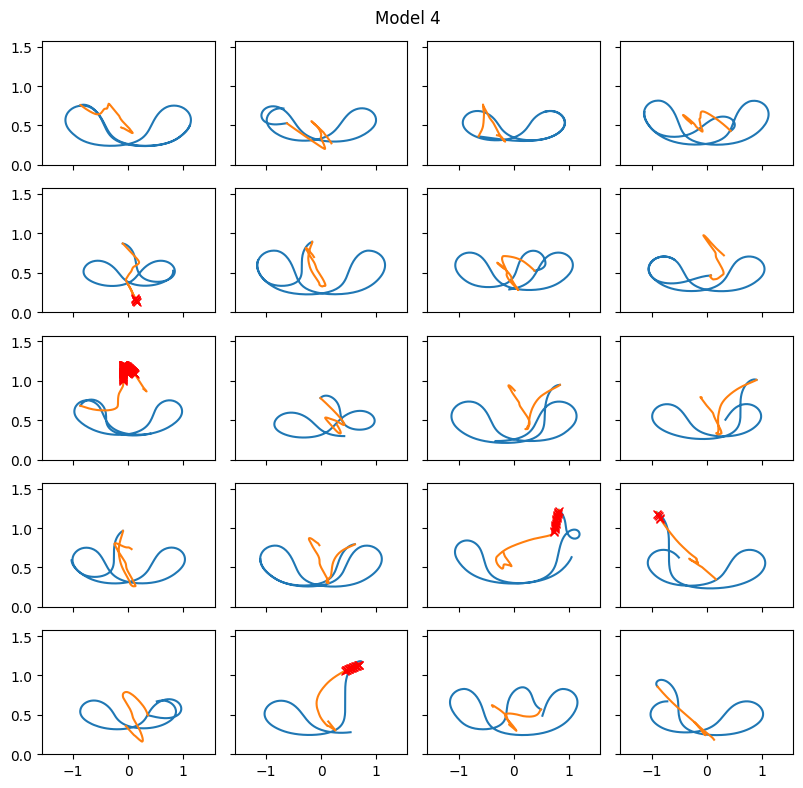

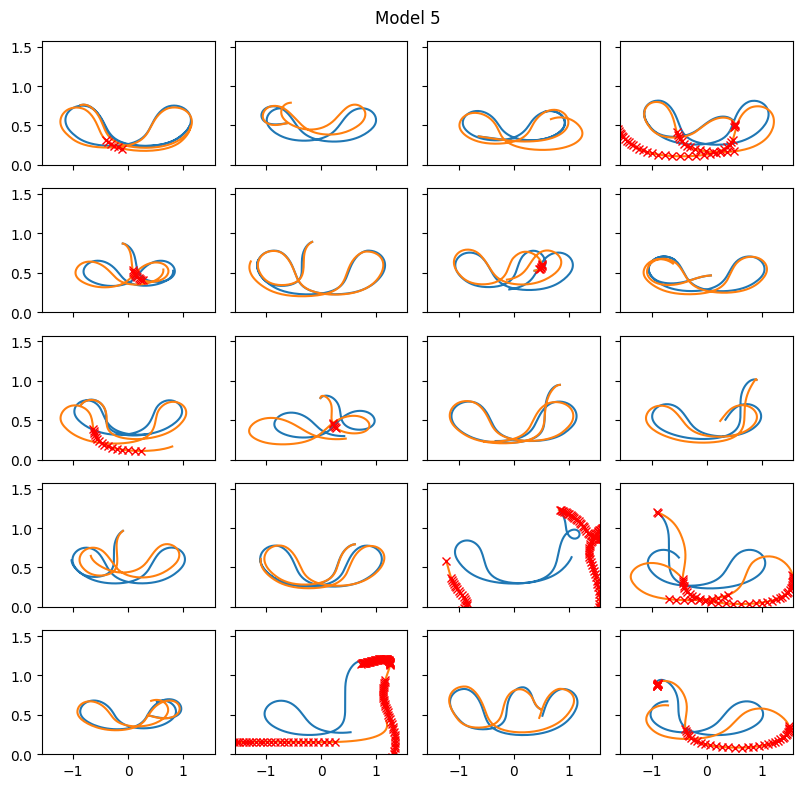

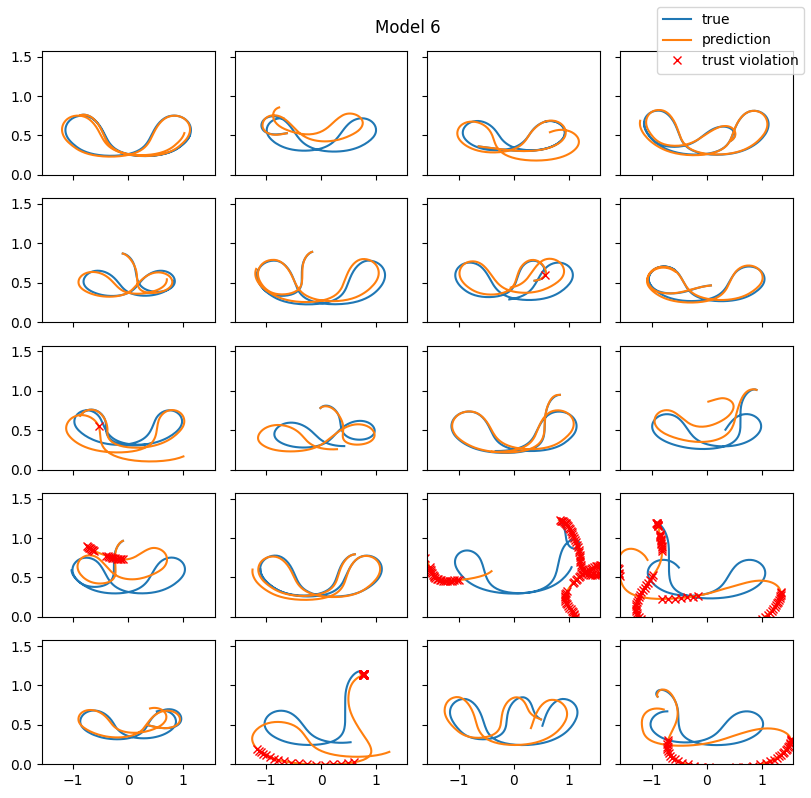

In [108]:
import matplotlib.pyplot as plt
import numpy as np

trust_threshold = 0.02

for model_num in range(6):
    fig, ax = plt.subplots(n_row, n_col, sharex=True, sharey=True, figsize=(8, 8))

    for i, res_i in enumerate(test_res[:n_eval]):
        ax[i // n_col, np.mod(i, n_col)].plot(res_i['states'][:, 1], res_i['states'][:, 0], label='true')
        
        nn_traj = nn_traj_all[model_num]
        nn_trust = nn_trust_all[model_num]
        
        ax[i // n_col, np.mod(i, n_col)].plot(nn_traj[i][:, 1], nn_traj[i][:, 0], label='prediction')

        viol_ind = (nn_trust[i] >= trust_threshold).flatten()
        ax[i // n_col, np.mod(i, n_col)].plot(nn_traj[i][1:, :][viol_ind, 1], nn_traj[i][1:, :][viol_ind, 0],
                                              'x', color='red', label='trust violation')

        ax[i // n_col, np.mod(i, n_col)].set_xlim(-np.pi / 2, np.pi / 2)
        ax[i // n_col, np.mod(i, n_col)].set_ylim(0, np.pi / 2)

    fig.suptitle(f"Model {model_num+1}")
    fig.tight_layout()

# Add a common legend outside the subplots
handles, labels = ax[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

plt.show()


In [122]:
trust_threshold = 0.02
cases_above_threshold = {}

for model_num in range(1, 7):  # Iterate over models 1 to 6
    nn_model = globals()[f'nn_model_{model_num}']
    activation_model = globals()[f'activation_model_{model_num}']
    
    num_cases_above_threshold = 0
    total_diff_above_threshold = 0
    diff_per_case = []
    
    for case in range(20):
        x0 = (test_res[case]['states'][0]).reshape(-1, 1)
        a_train = activation_model.predict(nn_in_train_scaled)
        
        pm = NNPredictModel(nn_model, activation_model, a_train, in_scaler, out_scaler, x0, sig_e=1, sig_w=1e3)
        
        for k in range(test_res[case]['states'].shape[0]):
            u0 = test_res[case]['input'][k]
            p = test_res[case]['wind'][k]
            pm.make_step(u0, p)
        
        # Calculate how much each value above the threshold exceeds the threshold
        diff_above_threshold = [value - trust_threshold for value in pm.v if value > trust_threshold]
        
        # Update total difference above threshold
        total_diff_above_threshold += sum(diff_above_threshold)
        
        # Check if any uncertainty values are above the threshold for this case
        if any(value > trust_threshold for value in pm.v):
            num_cases_above_threshold += 1
            diff_per_case.append(diff_above_threshold)
    
    # Calculate average difference above threshold
    average_diff_above_threshold = total_diff_above_threshold / num_cases_above_threshold if num_cases_above_threshold > 0 else 0
    
    cases_above_threshold[model_num] = {
        'count': num_cases_above_threshold,
        'average_diff': average_diff_above_threshold,
        'diff_per_case': diff_per_case
    }



101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
101/101 ━━━━━

In [123]:
import numpy as np

for model, info in cases_above_threshold.items():
    if info['count'] > 0:
        diff_per_case_flat = np.concatenate(info['diff_per_case'])
        average_diff_above_threshold = np.mean(diff_per_case_flat)
        print(f"Model {model}: {info['count']} cases above threshold (Average value above threshold: {average_diff_above_threshold:.4f})")
        #print("Difference per case:")
        #for idx, diff in enumerate(info['diff_per_case']):
         #   print(f"Case {idx + 1}: {diff}")
    else:
        print(f"Model {model}: No cases above threshold")


Model 1: 14 cases above threshold (Average value above threshold: 0.0267)
Model 2: 8 cases above threshold (Average value above threshold: 0.0287)
Model 3: 9 cases above threshold (Average value above threshold: 0.0238)
Model 4: 5 cases above threshold (Average value above threshold: 0.0099)
Model 5: 10 cases above threshold (Average value above threshold: 0.0223)
Model 6: 7 cases above threshold (Average value above threshold: 0.0195)


Print the cases > thresh for each model and each thresh value:

In [126]:
def analyze_thresholds(threshold_values, nn_models, activation_models, test_res, nn_in_train_scaled, in_scaler, out_scaler):
    cases_above_threshold = {}
    
    for model_num, (nn_model, activation_model) in enumerate(zip(nn_models, activation_models), start=1):
        num_cases_above_threshold_per_model = {}
        
        for threshold in threshold_values:
            num_cases_above_threshold = 0
            
            for case in range(20):
                x0 = (test_res[case]['states'][0]).reshape(-1, 1)
                a_train = activation_model.predict(nn_in_train_scaled)
                
                pm = NNPredictModel(nn_model, activation_model, a_train, in_scaler, out_scaler, x0, sig_e=1, sig_w=1e3)
                
                for k in range(test_res[case]['states'].shape[0]):
                    u0 = test_res[case]['input'][k]
                    p = test_res[case]['wind'][k]
                    pm.make_step(u0, p)
                
                # Check if any uncertainty values are above the threshold for this case
                if any(value > threshold for value in pm.v):
                    num_cases_above_threshold += 1
            
            num_cases_above_threshold_per_model[threshold] = num_cases_above_threshold
        
        cases_above_threshold[model_num] = num_cases_above_threshold_per_model
    
    return cases_above_threshold

# Usage example
threshold_values = [0.005, 0.0075, 0.01, 0.02, 0.03, 0.04, 0.05]
result = analyze_thresholds(threshold_values, [globals()[f'nn_model_{i}'] for i in range(1, 7)],
                            [globals()[f'activation_model_{i}'] for i in range(1, 7)], test_res, nn_in_train_scaled,
                            in_scaler, out_scaler)


101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
101/101 ━━━

In [128]:
result

{1: {0.005: 20, 0.0075: 20, 0.01: 20, 0.02: 14, 0.03: 7, 0.04: 6, 0.05: 4},
 2: {0.005: 20, 0.0075: 20, 0.01: 16, 0.02: 8, 0.03: 3, 0.04: 2, 0.05: 2},
 3: {0.005: 20, 0.0075: 20, 0.01: 18, 0.02: 9, 0.03: 5, 0.04: 5, 0.05: 5},
 4: {0.005: 20, 0.0075: 19, 0.01: 15, 0.02: 5, 0.03: 2, 0.04: 2, 0.05: 1},
 5: {0.005: 20, 0.0075: 20, 0.01: 18, 0.02: 10, 0.03: 5, 0.04: 3, 0.05: 3},
 6: {0.005: 20, 0.0075: 20, 0.01: 18, 0.02: 7, 0.03: 4, 0.04: 4, 0.05: 3}}